# Importing Libraries

In [1]:
# to handle tabular data
import numpy as np
import pandas as pd

# visualize the data
import seaborn as sns 
import matplotlib.pyplot as plt

# cross validation
from sklearn.model_selection import train_test_split

# Algorithms
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

# Evaluation
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import systemcheck


c:\Users\Anisha\OneDrive\Desktop\diabetics
everything is checked.. system okay


# Data Acquisition

In [2]:
data = pd.read_csv("diabetes_dataset__2019.csv")
data

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


# Data Analysis

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               952 non-null    object 
 1   Gender            952 non-null    object 
 2   Family_Diabetes   952 non-null    object 
 3   highBP            952 non-null    object 
 4   PhysicallyActive  952 non-null    object 
 5   BMI               948 non-null    float64
 6   Smoking           952 non-null    object 
 7   Alcohol           952 non-null    object 
 8   Sleep             952 non-null    int64  
 9   SoundSleep        952 non-null    int64  
 10  RegularMedicine   952 non-null    object 
 11  JunkFood          952 non-null    object 
 12  Stress            952 non-null    object 
 13  BPLevel           952 non-null    object 
 14  Pregancies        910 non-null    float64
 15  Pdiabetes         951 non-null    object 
 16  UriationFreq      952 non-null    object 
 1

In [4]:
data.isna().sum()

Age                  0
Gender               0
Family_Diabetes      0
highBP               0
PhysicallyActive     0
BMI                  4
Smoking              0
Alcohol              0
Sleep                0
SoundSleep           0
RegularMedicine      0
JunkFood             0
Stress               0
BPLevel              0
Pregancies          42
Pdiabetes            1
UriationFreq         0
Diabetic             1
dtype: int64

In [5]:
data

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [6]:
data.dropna(inplace=True)

In [7]:
data

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,50-59,Male,no,yes,one hr or more,39.0,no,no,8,6,no,occasionally,sometimes,high,0.0,0,not much,no
1,50-59,Male,no,yes,less than half an hr,28.0,no,no,8,6,yes,very often,sometimes,normal,0.0,0,not much,no
2,40-49,Male,no,no,one hr or more,24.0,no,no,6,6,no,occasionally,sometimes,normal,0.0,0,not much,no
3,50-59,Male,no,no,one hr or more,23.0,no,no,8,6,no,occasionally,sometimes,normal,0.0,0,not much,no
4,40-49,Male,no,no,less than half an hr,27.0,no,no,8,8,no,occasionally,sometimes,normal,0.0,0,not much,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,less than 40,Male,yes,no,more than half an hr,25.0,no,no,8,6,no,often,sometimes,normal,0.0,0,not much,yes
948,60 or older,Male,yes,yes,more than half an hr,27.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,quite often,yes
949,60 or older,Male,no,yes,none,23.0,no,no,6,5,yes,occasionally,sometimes,high,0.0,0,not much,no
950,60 or older,Male,no,yes,less than half an hr,27.0,no,yes,6,5,yes,occasionally,very often,high,0.0,0,not much,no


In [8]:
data.isna().sum()

Age                 0
Gender              0
Family_Diabetes     0
highBP              0
PhysicallyActive    0
BMI                 0
Smoking             0
Alcohol             0
Sleep               0
SoundSleep          0
RegularMedicine     0
JunkFood            0
Stress              0
BPLevel             0
Pregancies          0
Pdiabetes           0
UriationFreq        0
Diabetic            0
dtype: int64

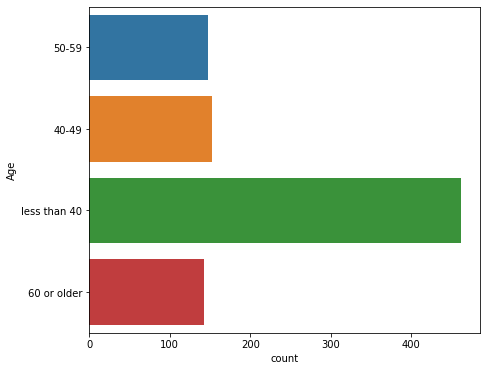

In [9]:
plt.figure(figsize=(7,6))
sns.countplot(y=data.Age,data=data)
plt.show()

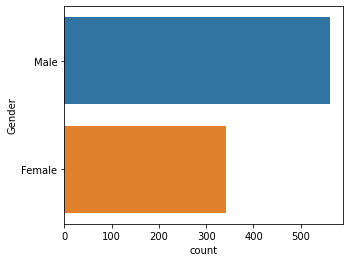

In [10]:
plt.figure(figsize=(5,4))
sns.countplot(y=data.Gender,data=data)
plt.show()

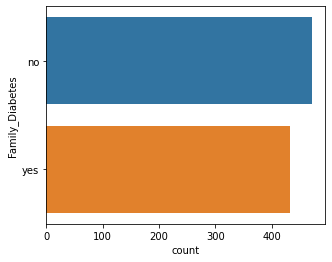

In [11]:
plt.figure(figsize=(5,4))
sns.countplot(y=data.Family_Diabetes,data=data)
plt.show()

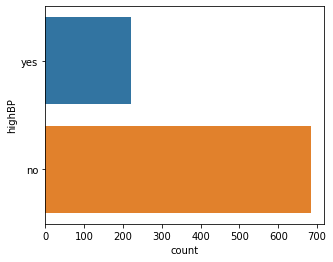

In [12]:
plt.figure(figsize=(5,4))
sns.countplot(y=data.highBP,data=data)
plt.show()

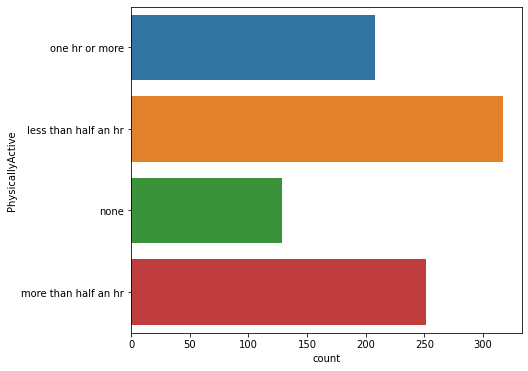

In [13]:
plt.figure(figsize=(7,6))
sns.countplot(y=data.PhysicallyActive,data=data)
plt.show()

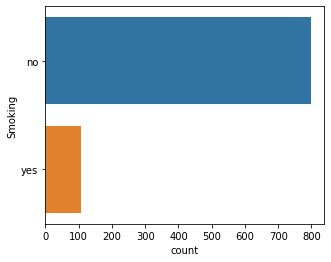

In [14]:
plt.figure(figsize=(5,4))
sns.countplot(y=data.Smoking,data=data)
plt.show()

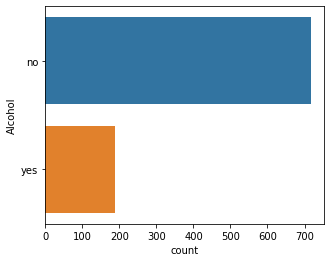

In [15]:
plt.figure(figsize=(5,4))
sns.countplot(y=data.Alcohol,data=data)
plt.show()

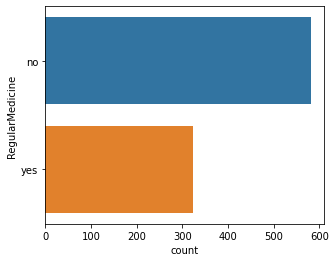

In [16]:
data.RegularMedicine.replace({"o":"no"},inplace=True)
plt.figure(figsize=(5,4))
sns.countplot(y=data.RegularMedicine,data=data)
plt.show()

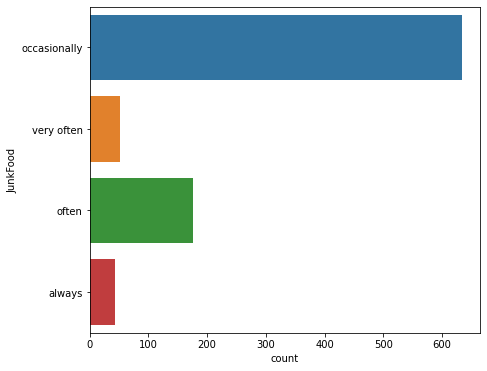

In [17]:
plt.figure(figsize=(7,6))
sns.countplot(y=data.JunkFood,data=data)
plt.show()

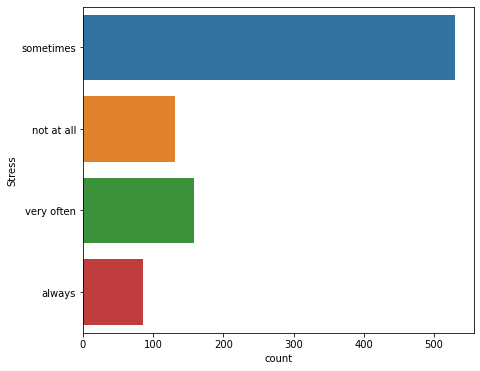

In [18]:
plt.figure(figsize=(7,6))
sns.countplot(y=data.Stress,data=data)
plt.show()

In [19]:
data.BPLevel.unique()

array(['high', 'normal', 'low', 'Low', 'High', 'normal '], dtype=object)

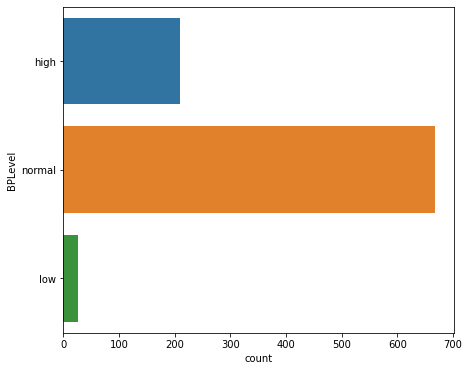

In [20]:
data.BPLevel.replace({"High":"high","normal ":"normal","Low":"low"},inplace=True)
plt.figure(figsize=(7,6))
sns.countplot(y=data.BPLevel,data=data)
plt.show()

In [21]:
data.Pregancies = data.Pregancies.apply(lambda x : float(x))

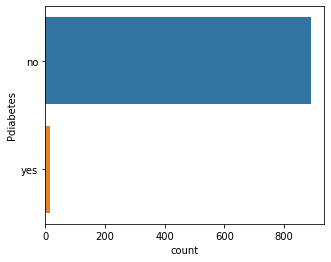

In [22]:
data.Pdiabetes.replace({"0":"no"},inplace=True)
plt.figure(figsize=(5,4))
sns.countplot(y=data.Pdiabetes,data=data)
plt.show()


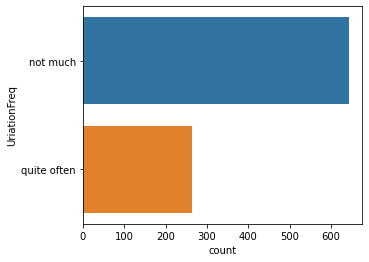

In [23]:
plt.figure(figsize=(5,4))
sns.countplot(y=data.UriationFreq,data=data)
plt.show()

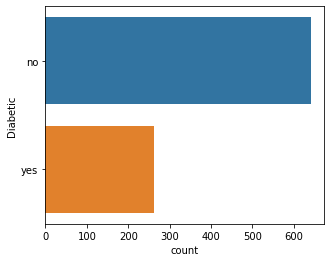

In [24]:
data.Diabetic.replace({" no":"no"},inplace=True)
plt.figure(figsize=(5,4))
sns.countplot(y=data.Diabetic,data=data)
plt.show()

In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 905 entries, 0 to 951
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               905 non-null    object 
 1   Gender            905 non-null    object 
 2   Family_Diabetes   905 non-null    object 
 3   highBP            905 non-null    object 
 4   PhysicallyActive  905 non-null    object 
 5   BMI               905 non-null    float64
 6   Smoking           905 non-null    object 
 7   Alcohol           905 non-null    object 
 8   Sleep             905 non-null    int64  
 9   SoundSleep        905 non-null    int64  
 10  RegularMedicine   905 non-null    object 
 11  JunkFood          905 non-null    object 
 12  Stress            905 non-null    object 
 13  BPLevel           905 non-null    object 
 14  Pregancies        905 non-null    float64
 15  Pdiabetes         905 non-null    object 
 16  UriationFreq      905 non-null    object 
 1

In [26]:
data.Diabetic.unique()

array(['no', 'yes'], dtype=object)

In [27]:
data.Age.replace({'50-59':0, '40-49':1, 'less than 40':2, '60 or older':3},inplace=True)
data.Gender.replace({'Male':1, 'Female':0},inplace=True)
data.Family_Diabetes.replace({'no':0, 'yes':1},inplace=True)
data.highBP.replace({'no':0, 'yes':1},inplace=True)
data.PhysicallyActive.replace({'one hr or more':0, 'less than half an hr':1, 'none':2,'more than half an hr':3},inplace=True)
data.Smoking.replace({'no':0, 'yes':1},inplace=True)
data.Alcohol.replace({'no':0, 'yes':1},inplace=True)
data.RegularMedicine.replace({'no':0, 'yes':1},inplace=True)
data.JunkFood.replace({'occasionally':0, 'very often':1, 'often':2, 'always':3},inplace=True)
data.Stress.replace({'sometimes':0, 'not at all':1, 'very often':2, 'always':3},inplace=True)
data.BPLevel.replace({'high':2, 'normal':1, 'low':0},inplace=True)
data.Pdiabetes.replace({'no':0, 'yes':1},inplace=True)
data.UriationFreq.replace({'not much':0, 'quite often':1},inplace=True)
data.Diabetic.replace({'no':0, 'yes':1},inplace=True)

In [28]:
data.describe()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
count,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000,905.000000
mean,1.660773,0.620994,0.478453,0.243094,1.467403,25.520442,0.117127,0.206630,6.956906,5.546961,0.356906,0.592265,0.779006,1.202210,0.386740,0.015470,0.290608,0.290608
std,0.930587,0.485408,0.499812,0.429189,1.124589,5.276835,0.321749,0.405111,1.287843,1.870904,0.479352,0.960817,1.045323,0.470355,0.910023,0.123479,0.454294,0.454294
min,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,1.000000,22.000000,0.000000,0.000000,6.000000,4.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,7.000000,6.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,1.000000,1.000000,0.000000,3.000000,28.000000,0.000000,0.000000,8.000000,7.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,3.000000,1.000000,1.000000,1.000000,3.000000,45.000000,1.000000,1.000000,11.000000,11.000000,1.000000,3.000000,3.000000,2.000000,4.000000,1.000000,1.000000,1.000000


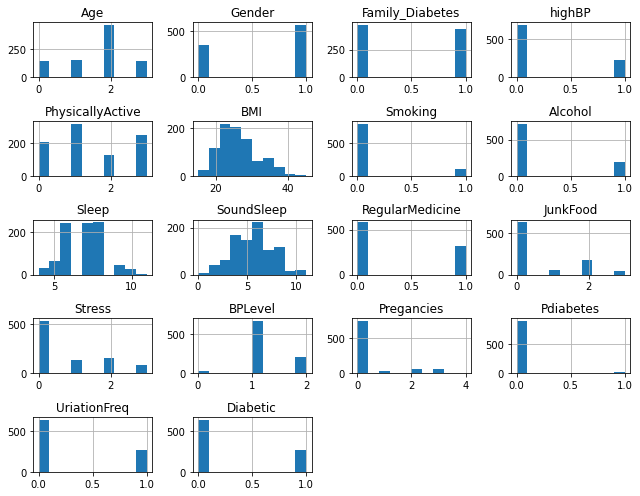

In [29]:
data.hist(figsize=(9,7))
plt.tight_layout()
plt.show()

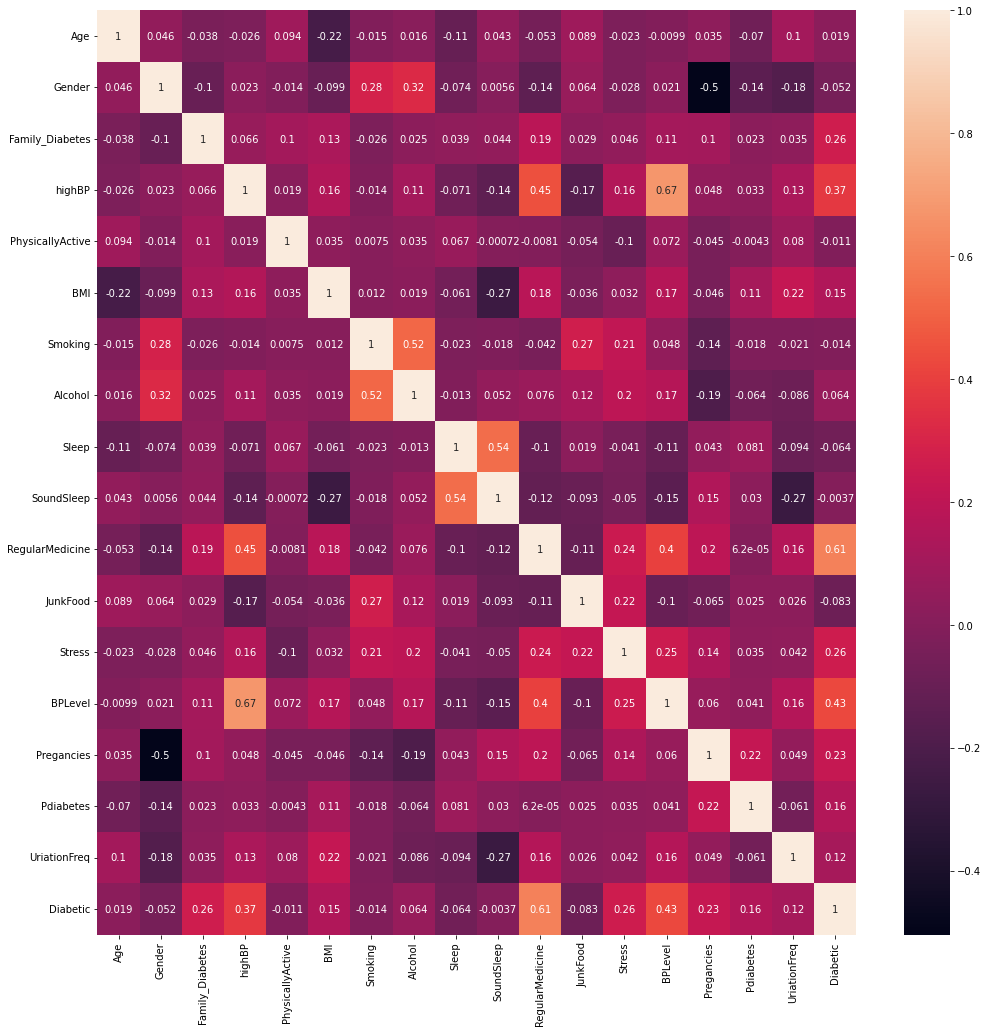

In [30]:
plt.figure(figsize=(17,17))
sns.heatmap(data.corr(),annot=True)
plt.show()

# Feature selection

In [31]:
etc = ExtraTreesClassifier(random_state=7)
etc.fit(data.drop(columns=["Diabetic"]),data["Diabetic"])
print("importance of each column:\n",etc.feature_importances_)

importance of each column:
 [0.13187353 0.02218701 0.04964271 0.06184055 0.04686455 0.06929021
 0.01270533 0.02524247 0.04705963 0.05520979 0.24033519 0.02901097
 0.05855375 0.07130378 0.03285548 0.01974729 0.02627773]


In [32]:
important_columns = etc.feature_importances_>etc.feature_importances_.mean()
selected_columns = []
for i in range(len(important_columns)):
    if important_columns[i] == True:
        selected_columns.append(data.columns[i])
    print(important_columns[i],":",data.columns[i])

True : Age
False : Gender
False : Family_Diabetes
True : highBP
False : PhysicallyActive
True : BMI
False : Smoking
False : Alcohol
False : Sleep
False : SoundSleep
True : RegularMedicine
False : JunkFood
False : Stress
True : BPLevel
False : Pregancies
False : Pdiabetes
False : UriationFreq


In [33]:
selected_columns

['Age', 'highBP', 'BMI', 'RegularMedicine', 'BPLevel']

In [34]:
X = data[selected_columns]
y = data.Diabetic

In [35]:
X

,Age,highBP,BMI,RegularMedicine,BPLevel
0,0,1,39.0,0,2
1,0,1,28.0,1,1
2,1,0,24.0,0,1
3,0,0,23.0,0,1
4,1,0,27.0,0,1
...,...,...,...,...,...
947,2,0,25.0,0,1
948,3,1,27.0,1,2
949,3,1,23.0,1,2
950,3,1,27.0,1,2


In [36]:
y

0      0
1      0
2      0
3      0
4      0
      ..
947    1
948    1
949    0
950    0
951    1
Name: Diabetic, Length: 905, dtype: int64

## Data Splitting

In [37]:
# X = data.drop(columns=["Diabetic"])
# y = data.Diabetic

In [38]:
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [39]:
x_train.shape

(724, 5)

In [40]:
y_train.shape

(724,)

In [41]:
x_test.shape

(181, 5)

In [42]:
y_test.shape

(181,)

# Training and Testing Logistic Rgression

In [43]:
lrc = LogisticRegression(max_iter=300)
lrc.fit(x_train,y_train)
lrc_pred = lrc.predict(x_test)

# Evaluation

In [44]:
print("Accuracy_score of Logistic Regression : ",accuracy_score(y_test,lrc_pred)*100,"%")

Accuracy_score of Logistic Regression :  80.11049723756905 %


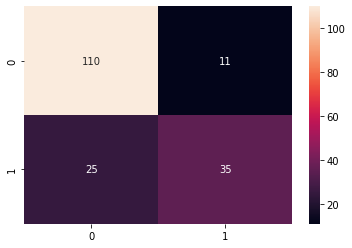

In [45]:
sns.heatmap(confusion_matrix(y_test,lrc_pred),annot=True,fmt="d")
plt.show()

In [46]:
print(classification_report(y_test,lrc_pred))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       121
           1       0.76      0.58      0.66        60

    accuracy                           0.80       181
   macro avg       0.79      0.75      0.76       181
weighted avg       0.80      0.80      0.79       181



# Training and Testing Support Vector Machine

In [47]:
svm = SVC(kernel="linear")
svm.fit(x_train,y_train)
svm_pred = svm.predict(x_test)

# Evaluation

In [48]:
print("Accuracy_score of Logistic Regression : ",accuracy_score(y_test,svm_pred)*100,"%")

Accuracy_score of Logistic Regression :  81.21546961325967 %


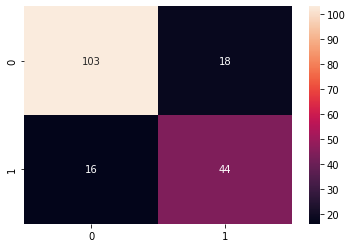

In [49]:
sns.heatmap(confusion_matrix(y_test,svm_pred),annot=True,fmt="d")
plt.show()

In [50]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       121
           1       0.71      0.73      0.72        60

    accuracy                           0.81       181
   macro avg       0.79      0.79      0.79       181
weighted avg       0.81      0.81      0.81       181



# Training and Testing Random Forest

In [51]:
rfr = RandomForestClassifier(class_weight="balanced")
rfr.fit(x_train,y_train)
rfr_pred = rfr.predict(x_test)

# Evaluation

In [52]:
print("Accuracy_score of Random Forest : ",accuracy_score(y_test,rfr_pred)*100,"%")

Accuracy_score of Random Forest :  91.71270718232044 %


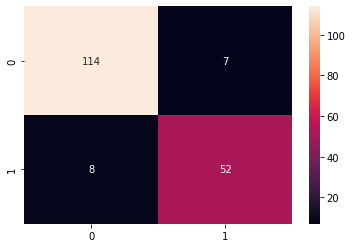

In [53]:
sns.heatmap(confusion_matrix(y_test,rfr_pred),annot=True,fmt="d")
plt.show()

In [54]:
print(classification_report(y_test,rfr_pred))

              precision    recall  f1-score   support

           0       0.93      0.94      0.94       121
           1       0.88      0.87      0.87        60

    accuracy                           0.92       181
   macro avg       0.91      0.90      0.91       181
weighted avg       0.92      0.92      0.92       181



# SAVING MODEL- RANDOM FOREST

In [55]:
import pickle

# Firstly we will be using the dump() function to save the model using pickle
saved_model = pickle.dumps(rfr)

# Then we will be loading that saved model
rfc_from_pickle = pickle.loads(saved_model)

# lastly, after loading that model we will use this to make predictions
rfc_from_pickle.predict(x_test)

array([0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0], dtype=int64)

In [56]:
data.head()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
0,0,1,0,1,0,39.0,0,0,8,6,0,0,0,2,0.0,0,0,0
1,0,1,0,1,1,28.0,0,0,8,6,1,1,0,1,0.0,0,0,0
2,1,1,0,0,0,24.0,0,0,6,6,0,0,0,1,0.0,0,0,0
3,0,1,0,0,0,23.0,0,0,8,6,0,0,0,1,0.0,0,0,0
4,1,1,0,0,1,27.0,0,0,8,8,0,0,0,1,0.0,0,0,0


In [57]:
data.tail()

,Age,Gender,Family_Diabetes,highBP,PhysicallyActive,BMI,Smoking,Alcohol,Sleep,SoundSleep,RegularMedicine,JunkFood,Stress,BPLevel,Pregancies,Pdiabetes,UriationFreq,Diabetic
947,2,1,1,0,3,25.0,0,0,8,6,0,2,0,1,0.0,0,0,1
948,3,1,1,1,3,27.0,0,0,6,5,1,0,0,2,0.0,0,1,1
949,3,1,0,1,2,23.0,0,0,6,5,1,0,0,2,0.0,0,0,0
950,3,1,0,1,1,27.0,0,1,6,5,1,0,2,2,0.0,0,0,0
951,3,0,1,1,0,30.0,0,0,7,4,1,0,0,2,2.0,0,1,1


In [58]:
rfr.predict([[1,0,27.0,0,1]]) #patient 4th

C:\python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [59]:
rfr.predict([[3,1,30.0,1,2]]) # patient 951th

C:\python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [62]:
rfr.predict([[2,0,18,0,1]]) #keerthi

C:\python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [63]:
rfr.predict([[2,0,22.0,1,0]]) #vasanthi

C:\python\Python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)